In [10]:
import pandas as pd

import geopandas as gpd
 
import contextily as ctx

import matplotlib.pyplot as plt

import plotly.express as px

import seaborn as sns

from pointpats import centrography

import numpy

In [11]:
basic2019datadf = gpd.read_file('Data/2019_OAK_311_NoBlank.csv')
basic2019datadf

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,STATUS,REFERREDTO,DATETIMECLOSED,SRX,SRY,COUNCILDISTRICT,BEAT,Time to Close,LAT,LONG,geometry
0,927576,7/23/19 15:38,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,,7/26/19 13:45,6055962.501,2132386.75,CCD1,12Y,3,37.83815973,-122.2513029,None
1,918469,6/25/19 08:34,SeeClickFix,Streets - Guardrail Repair,STREETSW,CLOSED,,7/10/19 18:11,6063364.409,2136673.615,CCD1,13Y,15,37.85030836,-122.225949,None
2,922854,7/9/19 12:17,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,,7/22/19 16:40,6055410.001,2116416.751,CCD2,19X,13,37.79428033,-122.2521805,None
3,917741,6/22/19 16:00,SeeClickFix,Streets - Street Deterioration,STREETSW,OPEN,,,6076796.539,2120845.822,CCD4,22Y,Open,37.80751844,-122.1784517,None
4,927190,7/22/19 16:17,SeeClickFix,Streets - Street Deterioration,STREETSW,OPEN,,,6071960.1,2128430.85,CCD4,13Z,Open,37.82810651,-122.1956658,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5280,923771,7/11/19 17:33,SeeClickFix,Streets/Sidewalks - Other/Complex,STREETSW,OPEN,,,6085411.691,2097300.792,CCD7,32Y,Open,37.74328641,-122.1472008,None
5281,921704,7/5/19 14:02,Email,Streets - Potholes/Depression,STREETSW,OPEN,,,6056022.087,2123898.335,CCD2,14Y,Open,37.81485504,-122.2505468,None
5282,916830,6/19/19 12:43,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,,7/1/19 06:25,6058128,2118764.25,CCD2,17Y,12,37.80086559,-122.2429268,None
5283,916568,6/18/19 19:20,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,,6/24/19 14:52,6064486.543,2134004.608,CCD1,13Y,6,37.84303647,-122.2218931,None


In [12]:
basic2009datadf = gpd.read_file('oakland_data_update.csv')
basic2009datadf

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,LAT,LONG,STATUS,DATETIMECLOSED,COUNCILDISTRICT,PROBADDRESS,City,State,TIMETOCLOSE,geometry
0,"323,439",12/8/2009 11:05,Phone or Email,Streets - Street Deterioration,STREETSW,37.78827342,-122.1901048,UNFUNDED,,CCD4,4448 PAMPAS AV,Oakland,CA,40000,None
1,"323,234",12/4/2009 16:20,Phone or Email,Streets - Potholes/Depression,STREETSW,37.82778391,-122.1948242,CANCEL,,CCD4,8 RYDAL CT,Oakland,CA,40000,None
2,"323,034",12/2/2009 12:51,Phone or Email,Streets/Sidewalks - Curb & Gutter Repair,STREETSW,37.80638039,-122.2072523,UNFUNDED,,CCD4,4100 LINCOLN AVE,Oakland,CA,40000,None
3,"323,003",12/2/2009 10:23,Phone or Email,Streets - Street Deterioration,STREETSW,37.83726266,-122.2257336,CLOSED,,CCD1,HARBORD DR & FLORENCE AV,Oakland,CA,40000,None
4,"321,683",11/13/2009 12:58,Phone or Email,Streets - Street Deterioration,STREETSW,37.81606615,-122.26249,UNFUNDED,,CCD3,275 28TH ST,Oakland,CA,40000,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,"317,437",10/5/2009 12:11,Phone or Email,Streets - Potholes/Depression,STREETSW,37.81913177,-122.2534458,CLOSED,10/5/2009 14:09,CCD2,OAKLAND AV & SANTA CLARA AV,Oakland,CA,0.1,None
522,"317,054",9/30/2009 13:50,Phone or Email,Streets - Potholes/Depression,STREETSW,37.77946679,-122.205585,CLOSED,9/30/2009 15:09,CCD5,CONGRESS AV & COURTLAND AV,Oakland,CA,0.1,None
523,"322,684",11/25/2009 11:17,Phone or Email,Streets/Sidewalks - Portable Barriers Maint,STREETSW,37.86406206,-122.2332864,CLOSED,11/25/2009 11:20,CCD1,CLAREMONT AV & RISPIN DR,Oakland,CA,0,None
524,"317,946",10/8/2009 15:58,Phone or Email,Streets - Potholes/Depression,STREETSW,37.83296523,-122.2648865,CLOSED,10/8/2009 16:00,CCD1,541 45TH STREET,Oakland,CA,0,None


In [13]:
basic2009datadf['Time to Close'] = basic2009datadf['TIMETOCLOSE']
basic2009datadf.head(1)

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,LAT,LONG,STATUS,DATETIMECLOSED,COUNCILDISTRICT,PROBADDRESS,City,State,TIMETOCLOSE,geometry,Time to Close
0,"323,439",12/8/2009 11:05,Phone or Email,Streets - Street Deterioration,STREETSW,37.78827342,-122.1901048,UNFUNDED,,CCD4,4448 PAMPAS AV,Oakland,CA,40000,None,40000


In [14]:
basic2012datadf = gpd.read_file('Data/2012Oakland311Data.csv')
basic2012datadf

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,LAT,LONG,STATUS,REFERREDTO,DATETIMECLOSED,Time to Close,SRX,SRY,COUNCILDISTRICT,BEAT,PROBADDRESS,City,State,geometry
0,439799,12/31/12 09:20,Website,Streets - Potholes/Depression,STREETSW,37.84277233,-122.2366165,OPEN,,,Open,6060234,2133987,CCD1,13X,OSTRANDER RD & ROMANY RD,Oakland,CA,None
1,439680,12/28/12 17:01,SeeClickFix,Pothole (report from SeeClickFix),STREETSW,37.84178211,-122.2732771,OPEN,,,Open,6049643,2133825,CCD1,10Y,874 57TH ST,Oakland,CA,None
2,439623,12/27/12 17:10,SeeClickFix,Pothole (report from SeeClickFix),STREETSW,37.81353118,-122.2552835,OPEN,,,Open,6054645,2123442,CCD3,14X,280 PERKINS ST,Oakland,CA,None
3,439499,12/26/12 09:01,SeeClickFix,Streets - Potholes/Depression,STREETSW,37.8016875,-122.2734238,OPEN,,,Open,6049324,2119229,CCD3,03Y,469 10TH STREET,Oakland,CA,None
4,439572,12/26/12 23:20,SeeClickFix,Street Issue (report from SeeClickFix),STREETSW,37.79815247,-122.2448743,OPEN,,,Open,6057547,2117787,CCD2,17X,E 21ST ST & 8TH AV,Oakland,CA,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,400913,3/15/12 10:48,SeeClickFix,Streets - Potholes/Depression,STREETSW,37.74649611,-122.2022234,CLOSED,,5/20/21 16:11,3353,6069526,2098754,CCD7,31X,7677 OAKPORT ST,Oakland,CA,None
1961,410121,5/24/12 08:22,Phone or Email,Streets - Potholes/Depression,STREETSW,37.7760796,-122.2188512,CLOSED,,8/5/21 16:17,3360,6064917,2109612,CCD5,23X,1551 38TH AV,Oakland,CA,None
1962,406474,4/26/12 16:33,Phone or Email,Streets - Potholes/Depression,STREETSW,37.77853723,-122.1759783,CLOSED,,8/5/21 09:05,3387,6077322,2110282,CCD6,29X,6147 OAKDALE AV,Oakland,CA,None
1963,400297,3/11/12 16:27,Website,Streets - Potholes/Depression,STREETSW,37.8242676,-122.2645443,CLOSED,,6/29/21 19:10,3397,6052044,2127401,CCD3,08X,469 36TH ST,Oakland,CA,None


In [15]:
basic2016datadf = gpd.read_file('Data/2016Oakland311Data.csv')
basic2016datadf

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,LAT,LONG,STATUS,REFERREDTO,DATETIMECLOSED,field_11,SRX,SRY,COUNCILDISTRICT,BEAT,Time To Close,PROBADDRESS,City,State,geometry
0,625479,1/1/16 13:36,Website,Streets - Potholes/Depression,STREETSW,37.80850456,-122.2397783,CLOSED,,7/17/17 17:40,563,6059089.23,2121528.37,CCD2,16X,563,830 TRESTLE GLEN RD,Oakland,CA,None
1,625486,1/1/16 14:10,SeeClickFix,Streets - Potholes/Depression,STREETSW,37.80046784,-122.2810167,CLOSED,,8/22/18 15:21,964,6047122.22,2118826.63,CCD3,02X,964,5TH ST & CASTRO ST,Oakland,CA,None
2,625501,1/1/16 18:10,SeeClickFix,Streets - Potholes/Depression,STREETSW,37.74089705,-122.1562645,CLOSED,,1/7/16 11:07,5,6082775.98,2096477.17,CCD7,32Y,5,2206 107TH AV,Oakland,CA,None
3,625505,1/1/16 19:11,Website,Streets - Potholes/Depression,STREETSW,37.84518339,-122.2206966,CLOSED,,1/5/16 15:38,3,6064846.36,2134779.87,CCD1,13Y,3,6160 FAIRLANE DR,Oakland,CA,None
4,625576,1/2/16 16:12,Website,Streets - Potholes/Depression,STREETSW,37.78749691,-122.2351276,CLOSED,,7/19/17 16:37,564,6060290.72,2113855.38,CCD2,18X,564,22ND AV & COMMERCE WY,Oakland,CA,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3404,701324,12/30/16 13:53,SeeClickFix,Streets - Potholes/Depression,STREETSW,37.84451196,-122.2650873,CLOSED,,4/12/17 06:57,102,6052026.22,2134774.13,CCD1,11X,102,59TH ST & SHATTUCK AV,Oakland,CA,None
3405,701339,12/30/16 15:25,Phone,Sidewalk - Damage,STREETSW,37.77578123,-122.1925943,OPEN,,,Open,6072502.47,2109365.07,CCD6,28X,Open,5415 FLEMING AV,Oakland,CA,None
3406,701349,12/30/16 16:39,Website,Streets - Potholes/Depression,STREETSW,37.77207278,-122.1696847,CLOSED,,10/3/17 16:24,276,6079098.62,2107896.02,CCD6,29X,276,3045 BANTRY AV,Oakland,CA,None
3407,701351,12/30/16 16:53,Website,Streets - Potholes/Depression,STREETSW,37.83610676,-122.2251835,CLOSED,,9/12/17 06:48,255,6063490.07,2131499.25,CCD1,13X,255,5216 MASONIC AV,Oakland,CA,None


In [16]:
basic2016datadf['Time to Close'] = basic2016datadf['Time To Close']
basic2016datadf.head(1)

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,LAT,LONG,STATUS,REFERREDTO,DATETIMECLOSED,...,SRX,SRY,COUNCILDISTRICT,BEAT,Time To Close,PROBADDRESS,City,State,geometry,Time to Close
0,625479,1/1/16 13:36,Website,Streets - Potholes/Depression,STREETSW,37.80850456,-122.2397783,CLOSED,,7/17/17 17:40,...,6059089.23,2121528.37,CCD2,16X,563,830 TRESTLE GLEN RD,Oakland,CA,None,563


In [17]:
columns_to_keep = ['REQUESTID',
 'DATETIMEINIT',
 'SOURCE',
 'DESCRIPTION',
 'REQCATEGORY',
 'STATUS',
 'COUNCILDISTRICT',
 'Time to Close',
 'LAT',
 'LONG',
 'geometry']

In [18]:
newbasic2012datadf = basic2012datadf[columns_to_keep]
newbasic2012datadf.head(1)

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,STATUS,COUNCILDISTRICT,Time to Close,LAT,LONG,geometry
0,439799,12/31/12 09:20,Website,Streets - Potholes/Depression,STREETSW,OPEN,CCD1,Open,37.84277233,-122.2366165,None


In [19]:
newbasic2009datadf= basic2009datadf[columns_to_keep]
newbasic2009datadf.head(1)

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,STATUS,COUNCILDISTRICT,Time to Close,LAT,LONG,geometry
0,"323,439",12/8/2009 11:05,Phone or Email,Streets - Street Deterioration,STREETSW,UNFUNDED,CCD4,40000,37.78827342,-122.1901048,None


In [20]:
newbasic2016datadf = basic2016datadf[columns_to_keep]
newbasic2016datadf.head(1)

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,STATUS,COUNCILDISTRICT,Time to Close,LAT,LONG,geometry
0,625479,1/1/16 13:36,Website,Streets - Potholes/Depression,STREETSW,CLOSED,CCD2,563,37.80850456,-122.2397783,None


In [21]:
newbasic2019datadf = basic2019datadf[columns_to_keep]
newbasic2019datadf.head(1)

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,STATUS,COUNCILDISTRICT,Time to Close,LAT,LONG,geometry
0,927576,7/23/19 15:38,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,CCD1,3,37.83815973,-122.2513029,None


In [22]:
allyears311df = pd.concat([newbasic2019datadf,newbasic2009datadf,newbasic2016datadf,newbasic2012datadf])
allyears311df

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,STATUS,COUNCILDISTRICT,Time to Close,LAT,LONG,geometry
0,927576,7/23/19 15:38,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,CCD1,3,37.83815973,-122.2513029,None
1,918469,6/25/19 08:34,SeeClickFix,Streets - Guardrail Repair,STREETSW,CLOSED,CCD1,15,37.85030836,-122.225949,None
2,922854,7/9/19 12:17,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,CCD2,13,37.79428033,-122.2521805,None
3,917741,6/22/19 16:00,SeeClickFix,Streets - Street Deterioration,STREETSW,OPEN,CCD4,Open,37.80751844,-122.1784517,None
4,927190,7/22/19 16:17,SeeClickFix,Streets - Street Deterioration,STREETSW,OPEN,CCD4,Open,37.82810651,-122.1956658,None
...,...,...,...,...,...,...,...,...,...,...,...
1960,400913,3/15/12 10:48,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,CCD7,3353,37.74649611,-122.2022234,None
1961,410121,5/24/12 08:22,Phone or Email,Streets - Potholes/Depression,STREETSW,CLOSED,CCD5,3360,37.7760796,-122.2188512,None
1962,406474,4/26/12 16:33,Phone or Email,Streets - Potholes/Depression,STREETSW,CLOSED,CCD6,3387,37.77853723,-122.1759783,None
1963,400297,3/11/12 16:27,Website,Streets - Potholes/Depression,STREETSW,CLOSED,CCD3,3397,37.8242676,-122.2645443,None


In [23]:
allyears311df['Year'] = pd.DatetimeIndex(allyears311df['DATETIMEINIT']).year
allyears311df.sample(3)

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,STATUS,COUNCILDISTRICT,Time to Close,LAT,LONG,geometry,Year
142,"321,521",11/12/2009 11:56,Phone or Email,Streets - Potholes/Depression,STREETSW,CLOSED,CCD2,180,37.8071313,-122.2309256,None,2009
3950,909698,5/31/19 13:00,Phone,Streets - Potholes/Depression,STREETSW,CLOSED,CCD4,5,37.81781236,-122.2032701,None,2019
901,411132,5/31/12 18:20,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,CCD4,130,37.81117441,-122.1974848,None,2012


In [24]:
allyears311df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 11185 entries, 0 to 1964
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   REQUESTID        11185 non-null  object  
 1   DATETIMEINIT     11185 non-null  object  
 2   SOURCE           11185 non-null  object  
 3   DESCRIPTION      11185 non-null  object  
 4   REQCATEGORY      11185 non-null  object  
 5   STATUS           11185 non-null  object  
 6   COUNCILDISTRICT  11185 non-null  object  
 7   Time to Close    11185 non-null  object  
 8   LAT              11185 non-null  object  
 9   LONG             11185 non-null  object  
 10  geometry         0 non-null      geometry
 11  Year             11185 non-null  int64   
dtypes: geometry(1), int64(1), object(10)
memory usage: 1.1+ MB


In [25]:
allyears311df['LAT'] = allyears311df['LAT'].astype('float')

In [26]:
allyears311df['LONG'] = allyears311df['LONG'].astype('float64')

In [27]:
allyears311df = gpd.GeoDataFrame(allyears311df, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(allyears311df.LONG, allyears311df.LAT))

In [28]:
allyears311df.Year.value_counts()

2019    5285
2016    3409
2012    1965
2009     526
Name: Year, dtype: int64

In [29]:
no_open_allyears311df = allyears311df[allyears311df['Time to Close']!='Open']
no_open_allyears311df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 8456 entries, 0 to 1964
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   REQUESTID        8456 non-null   object  
 1   DATETIMEINIT     8456 non-null   object  
 2   SOURCE           8456 non-null   object  
 3   DESCRIPTION      8456 non-null   object  
 4   REQCATEGORY      8456 non-null   object  
 5   STATUS           8456 non-null   object  
 6   COUNCILDISTRICT  8456 non-null   object  
 7   Time to Close    8456 non-null   object  
 8   LAT              8456 non-null   float64 
 9   LONG             8456 non-null   float64 
 10  geometry         8456 non-null   geometry
 11  Year             8456 non-null   int64   
dtypes: float64(2), geometry(1), int64(1), object(8)
memory usage: 858.8+ KB


In [30]:
no_open_allyears311df['Time to Close'] = no_open_allyears311df['Time to Close'].astype('float')

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [31]:
no_open_allyears311df.describe()

,Time to Close,LAT,LONG,Year
count,8456.000000,8456.000000,8456.000000,8456.000000
mean,501.480996,37.791141,-122.244993,2016.135289
std,2704.684044,0.255996,0.620462,3.182842
min,0.000000,30.009900,-141.218751,2009.000000
25%,14.000000,37.776106,-122.253621,2012.000000
50%,75.000000,37.800988,-122.225084,2016.000000
75%,439.000000,37.824545,-122.198071,2019.000000
max,40000.000000,37.883006,-122.118635,2019.000000


In [32]:
closeyeardf = no_open_allyears311df.groupby(['Year']).median()[['Time to Close']]
closeyeardf

,Time to Close
Year,
2009,66.55
2012,245.00
2016,172.00
2019,32.00


<AxesSubplot:xlabel='Year'>

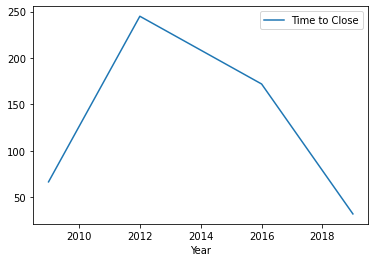

In [34]:
closeyeardf.plot()

In [35]:
allyears311df['x'] = allyears311df.geometry.x
allyears311df['y'] = allyears311df.geometry.y

In [36]:
no_open_allyears311df['x'] = no_open_allyears311df.geometry.x
no_open_allyears311df['y'] = no_open_allyears311df.geometry.y

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


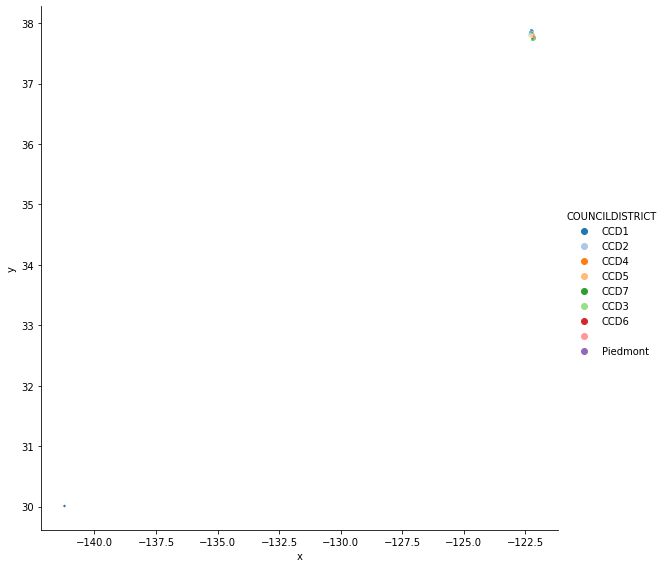

In [37]:
sns.relplot(data=allyears311df,
            x='x', 
            y='y',
            hue='COUNCILDISTRICT',
            palette='tab20',
            s=5,
            height=8)

In [38]:
clean_allyears311df = allyears311df[allyears311df['LAT']>=31]

In [39]:
clean_allyears311df.sort_values('LAT')

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,STATUS,COUNCILDISTRICT,Time to Close,LAT,LONG,geometry,Year,x,y
862,639886,3/8/16 14:47,Phone,Streets - Potholes/Depression,STREETSW,CLOSED,CCD7,99,37.725567,-122.176023,POINT (-122.17602 37.72557),2016,-122.176023,37.725567
3402,701322,12/30/16 13:44,Phone,Streets - Potholes/Depression,STREETSW,CLOSED,CCD7,65,37.725622,-122.199455,POINT (-122.19946 37.72562),2016,-122.199455,37.725622
3114,694539,11/17/16 20:02,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,CCD7,19,37.725632,-122.199351,POINT (-122.19935 37.72563),2016,-122.199351,37.725632
739,971427,12/20/19 13:30,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,CCD7,17,37.725659,-122.175725,POINT (-122.17573 37.72566),2019,-122.175725,37.725659
635,971183,12/19/19 16:10,Phone or Email,Streets - Potholes/Depression,STREETSW,CLOSED,CCD7,18,37.725694,-122.176185,POINT (-122.17618 37.72569),2019,-122.176185,37.725694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2608,889614,3/26/19 15:37,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,CCD1,83,37.879567,-122.221759,POINT (-122.22176 37.87957),2019,-122.221759,37.879567
534,633058,2/5/16 14:20,SeeClickFix,Streets/Sidewalks - Other/Complex,STREETSW,OPEN,CCD1,Open,37.881149,-122.230855,POINT (-122.23086 37.88115),2016,-122.230855,37.881149
1497,411674,6/5/12 15:33,Phone or Email,Streets - Potholes/Depression,STREETSW,CLOSED,CCD1,799,37.883006,-122.245803,POINT (-122.24580 37.88301),2012,-122.245803,37.883006
1444,409773,5/21/12 17:10,Website,Streets - Street Deterioration,STREETSW,CLOSED,CCD1,715,37.883006,-122.245803,POINT (-122.24580 37.88301),2012,-122.245803,37.883006


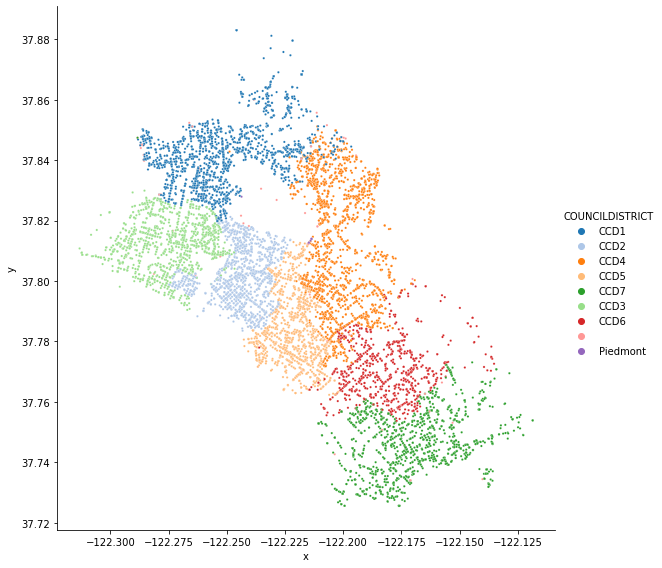

In [40]:
sns.relplot(data=clean_allyears311df,
            x='x', 
            y='y',
            hue='COUNCILDISTRICT',
            palette='tab20',
            s=5,
            height=8)

(-122.32294034521402, -122.10890575478597, 37.7176950475, 37.890878002499996)

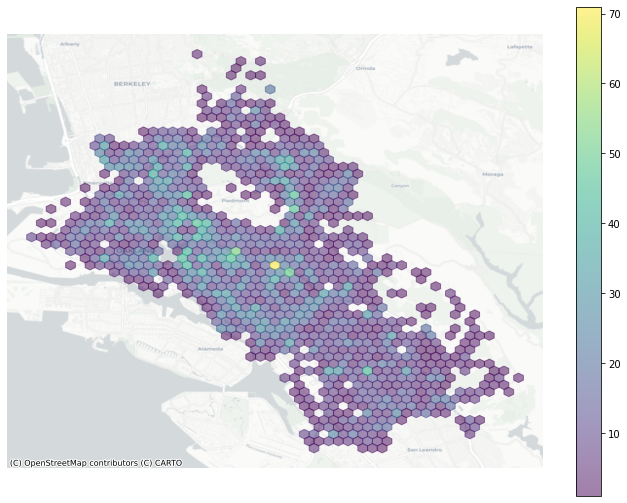

In [41]:
# Set up figure and axis
f, ax = plt.subplots(figsize=(12, 9))

# Generate and add hexbin with 50 hexagons in each 
# dimension, half transparency, ommitting grids with no crime,
# and using the viridis colormap
hb = ax.hexbin(
    x = clean_allyears311df['x'], 
    y = clean_allyears311df['y'],
    gridsize=50, 
    linewidths=1,
    alpha=0.5, 
    mincnt=1, # don't show zero
    cmap='viridis'
)

# Add basemap
ctx.add_basemap(
    ax, 
    crs='epsg:4326',
    source=ctx.providers.CartoDB.Positron
)

# Add colorbar
plt.colorbar(hb)

# Remove axes
ax.axis('off')

In [42]:
clean_noopen_311df = no_open_allyears311df[no_open_allyears311df['LAT']>=31]

In [43]:
Top_closuretimesdf = clean_noopen_311df[clean_noopen_311df['Time to Close']>=100]

(-122.321950930213, -122.10895286978699, 37.718338981, 37.890847339)

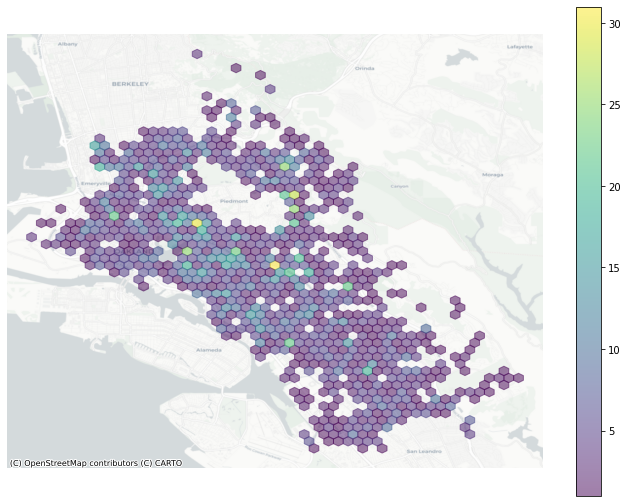

In [44]:
# Set up figure and axis
f, ax = plt.subplots(figsize=(12, 9))

# Generate and add hexbin with 50 hexagons in each 
# dimension, half transparency, ommitting grids with no crime,
# and using the viridis colormap
hb = ax.hexbin(
    x = Top_closuretimesdf['x'], 
    y = Top_closuretimesdf['y'],
    gridsize=50, 
    linewidths=1,
    alpha=0.5, 
    mincnt=1, # don't show zero
    cmap='viridis'
)

# Add basemap
ctx.add_basemap(
    ax, 
    crs='epsg:4326',
    source=ctx.providers.CartoDB.Positron
)

# Add colorbar
plt.colorbar(hb)

# Remove axes
ax.axis('off')

In [45]:
only_open_allyears311df = allyears311df[allyears311df['Time to Close']=='Open']

(-122.32273950020961, -122.11312349979039, 37.719443085, 37.888849795)

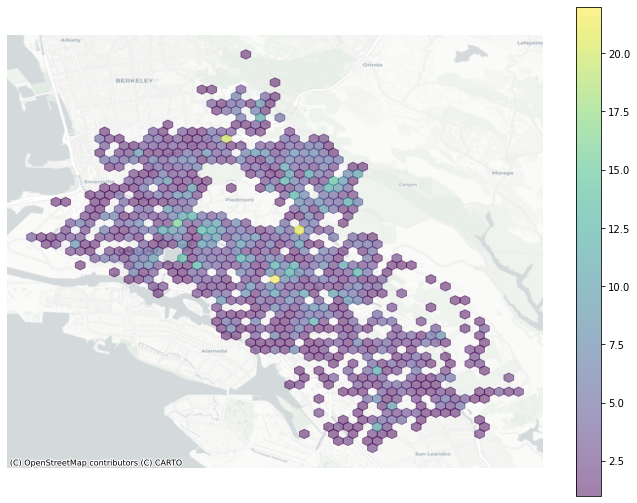

In [46]:
# Set up figure and axis
f, ax = plt.subplots(figsize=(12, 9))

# Generate and add hexbin with 50 hexagons in each 
# dimension, half transparency, ommitting grids with no crime,
# and using the viridis colormap
hb = ax.hexbin(
    x = only_open_allyears311df['x'], 
    y = only_open_allyears311df['y'],
    gridsize=50, 
    linewidths=1,
    alpha=0.5, 
    mincnt=1, # don't show zero
    cmap='viridis'
)

# Add basemap
ctx.add_basemap(
    ax, 
    crs='epsg:4326',
    source=ctx.providers.CartoDB.Positron
)

# Add colorbar
plt.colorbar(hb)

# Remove axes
ax.axis('off')

In [39]:
from keplergl import KeplerGl

In [40]:
map = KeplerGl(height=600,width=800)
map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(height=600)

In [41]:
map.add_data(data=clean_allyears311df,name='All 311 Pothole Requests 2009,2012,2016,2019')

In [47]:
clean_allyears311df.to_file("clean_allyears311df.geojson", driver='GeoJSON')